In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [6]:
df= pd.read_csv("play_tennis.csv")
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [9]:
df.shape

(14, 6)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[ 'play'] = le.fit_transform(df['play'])
df[ 'outlook'] = le.fit_transform(df['outlook'])
df[ 'temp'] = le.fit_transform(df['temp'])
df[ 'humidity'] = le.fit_transform(df['humidity'])
df[ 'wind'] = le.fit_transform(df['wind'])
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,2,1,0,1,0
1,D2,2,1,0,0,0
2,D3,0,1,0,1,1
3,D4,1,2,0,1,1
4,D5,1,0,1,1,1


In [13]:
x =df.drop(['day','play'], axis=1).values
x

array([[2, 1, 0, 1],
       [2, 1, 0, 0],
       [0, 1, 0, 1],
       [1, 2, 0, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 0],
       [0, 0, 1, 0],
       [2, 2, 0, 1],
       [2, 0, 1, 1],
       [1, 2, 1, 1],
       [2, 2, 1, 0],
       [0, 2, 0, 0],
       [0, 1, 1, 1],
       [1, 2, 0, 0]])

In [15]:
y = df['play'].values
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

[0 0 0 1 1]
Accuracy: 0.4
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.40      0.57         5

    accuracy                           0.40         5
   macro avg       0.50      0.20      0.29         5
weighted avg       1.00      0.40      0.57         5

Confusion Matrix:
 [[0 0]
 [3 2]]
Misclassification Rate: 0.6
R2 score 0.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Text(0, 0.5, 'Predicted(1)'), Text(0, 1.5, 'Predicted(0)')]

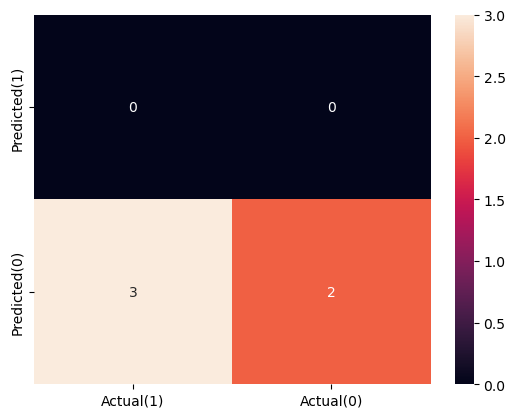

In [29]:
#iteration 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

misclassification_rate =1-accuracy
print("Misclassification Rate:", misclassification_rate)

print("R2 score",r2_score(y_test,y_pred))

import seaborn as sns
ax=plt.subplot()
cdf=pd.DataFrame(confusion_matrix_result)
sns.heatmap(cdf,annot=True)
ax.xaxis.set_ticklabels(labels=['Actual(1)','Actual(0)'])
ax.yaxis.set_ticklabels(labels=['Predicted(1)','Predicted(0)'])

[1 1 1 1 1]
Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5

Confusion Matrix:
 [[0 2]
 [0 3]]
Misclassification Rate: 0.4
R2 score -0.6666666666666665


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Text(0, 0.5, 'Predicted(1)'), Text(0, 1.5, 'Predicted(0)')]

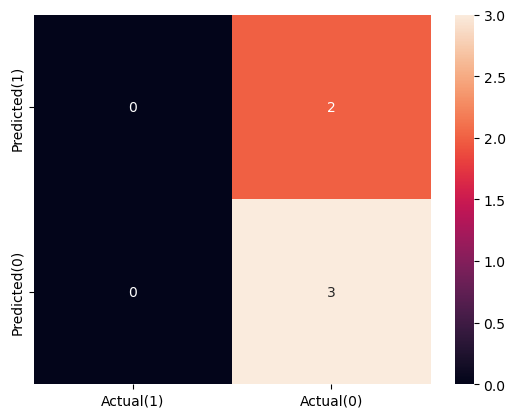

In [27]:
#iteration 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

misclassification_rate =1-accuracy
print("Misclassification Rate:", misclassification_rate)

print("R2 score",r2_score(y_test,y_pred))

import seaborn as sns
ax=plt.subplot()
cdf=pd.DataFrame(confusion_matrix_result)
sns.heatmap(cdf,annot=True)
ax.xaxis.set_ticklabels(labels=['Actual(1)','Actual(0)'])
ax.yaxis.set_ticklabels(labels=['Predicted(1)','Predicted(0)'])

[0 0 0 1 1 1]
Accuracy: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.40      0.50         5

    accuracy                           0.33         6
   macro avg       0.33      0.20      0.25         6
weighted avg       0.56      0.33      0.42         6

Confusion Matrix:
 [[0 1]
 [3 2]]
Misclassification Rate: 0.6666666666666667
R2 score -3.8


[Text(0, 0.5, 'Predicted(1)'), Text(0, 1.5, 'Predicted(0)')]

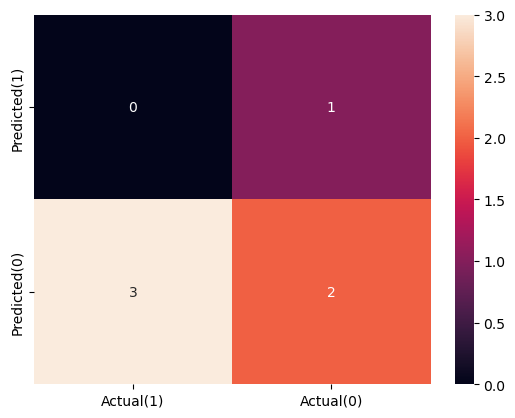

In [25]:
#iteration 2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

misclassification_rate =1-accuracy
print("Misclassification Rate:", misclassification_rate)

print("R2 score",r2_score(y_test,y_pred))

import seaborn as sns
ax=plt.subplot()
cdf=pd.DataFrame(confusion_matrix_result)
sns.heatmap(cdf,annot=True)
ax.xaxis.set_ticklabels(labels=['Actual(1)','Actual(0)'])
ax.yaxis.set_ticklabels(labels=['Predicted(1)','Predicted(0)'])

[1 1 0 1 1 1]
Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6

Confusion Matrix:
 [[1 1]
 [0 4]]
Misclassification Rate: 0.16666666666666663
R2 score 0.2500000000000001


[Text(0, 0.5, 'Predicted(1)'), Text(0, 1.5, 'Predicted(0)')]

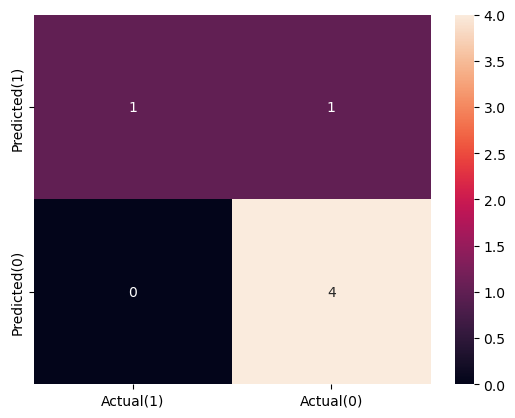

In [23]:
#iteration 2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

misclassification_rate =1-accuracy
print("Misclassification Rate:", misclassification_rate)

print("R2 score",r2_score(y_test,y_pred))

import seaborn as sns
ax=plt.subplot()
cdf=pd.DataFrame(confusion_matrix_result)
sns.heatmap(cdf,annot=True)
ax.xaxis.set_ticklabels(labels=['Actual(1)','Actual(0)'])
ax.yaxis.set_ticklabels(labels=['Predicted(1)','Predicted(0)'])

[0 0 0 1 0 0 1]
Accuracy: 0.42857142857142855
Classification Report:
               precision    recall  f1-score   support

           0       0.20      1.00      0.33         1
           1       1.00      0.33      0.50         6

    accuracy                           0.43         7
   macro avg       0.60      0.67      0.42         7
weighted avg       0.89      0.43      0.48         7

Confusion Matrix:
 [[1 0]
 [4 2]]
Misclassification Rate: 0.5714285714285714
R2 score -3.666666666666666


[Text(0, 0.5, 'Predicted(1)'), Text(0, 1.5, 'Predicted(0)')]

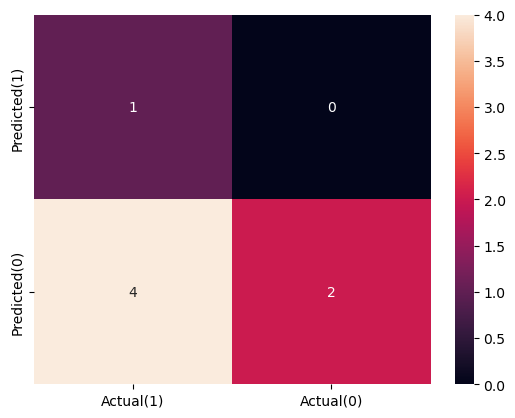

In [19]:
#iteration 3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

misclassification_rate =1-accuracy
print("Misclassification Rate:", misclassification_rate)

print("R2 score",r2_score(y_test,y_pred))

import seaborn as sns
ax=plt.subplot()
cdf=pd.DataFrame(confusion_matrix_result)
sns.heatmap(cdf,annot=True)
ax.xaxis.set_ticklabels(labels=['Actual(1)','Actual(0)'])
ax.yaxis.set_ticklabels(labels=['Predicted(1)','Predicted(0)'])

[0 0 1 1 1 1 1]
Accuracy: 0.42857142857142855
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      0.60      0.60         5

    accuracy                           0.43         7
   macro avg       0.30      0.30      0.30         7
weighted avg       0.43      0.43      0.43         7

Confusion Matrix:
 [[0 2]
 [2 3]]
Misclassification Rate: 0.5714285714285714
R2 score -1.7999999999999994


[Text(0, 0.5, 'Predicted(1)'), Text(0, 1.5, 'Predicted(0)')]

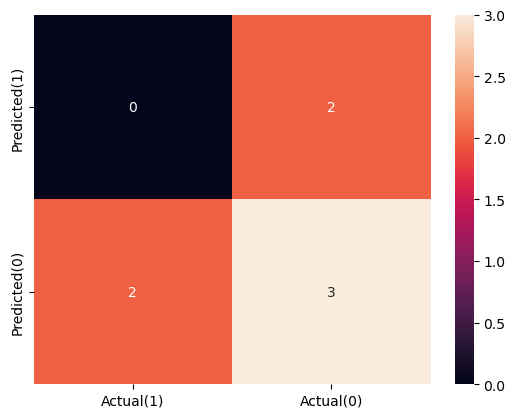

In [21]:
#iteration 3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

misclassification_rate =1-accuracy
print("Misclassification Rate:", misclassification_rate)

print("R2 score",r2_score(y_test,y_pred))

import seaborn as sns
ax=plt.subplot()
cdf=pd.DataFrame(confusion_matrix_result)
sns.heatmap(cdf,annot=True)
ax.xaxis.set_ticklabels(labels=['Actual(1)','Actual(0)'])
ax.yaxis.set_ticklabels(labels=['Predicted(1)','Predicted(0)'])